In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy import stats
from scipy.stats import linregress
import scipy.stats as st
from config import api_key
import json
import requests

# Load the data file, read and display it with Pandas
movies_data = Path("imdb_movies.csv")

# Set global float formatting to increase readability
pd.options.display.float_format = '{:,.2f}'.format

# Read and store into Pandas DataFrames
movies_df = pd.read_csv(movies_data)
movies_df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.00,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,"75,000,000.00","271,616,668.00",AU
1,Avatar: The Way of Water,12/15/2022,78.00,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,"460,000,000.00","2,316,794,914.00",AU
2,The Super Mario Bros. Movie,04/05/2023,76.00,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,"100,000,000.00","724,459,031.00",AU
3,Mummies,01/05/2023,70.00,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian","12,300,000.00","34,200,000.00",AU
4,Supercell,03/17/2023,61.00,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,"77,000,000.00","340,941,958.60",US


# Trim the unnecessary information and clean the data

In [2]:
# Trim the columns of data to the one we need
movies_df_trim = movies_df.drop(["overview","crew","orig_title","status","country"], axis=1)
#movies_df_reduced

# Rename the column name to be more user friendly
movies_df_trim = movies_df_trim.rename(columns={
    "names":"Name",
    "date_x":"Year",
    "score":"Score",
    "genre":"Genre",
    "orig_lang":"Language",
    "budget_x":"Budget",
    "revenue":"Revenue",
})

#Edit the "Year" column to remove the day and month
movies_df_trim.loc[:,"Year"]=pd.to_datetime(movies_df_trim["Year"], errors='coerce').dt.year.astype(int)
movies_df_trim

,Name,Year,Score,Genre,Language,Budget,Revenue
0,Creed III,2023,73.00,"Drama, Action",English,"75,000,000.00","271,616,668.00"
1,Avatar: The Way of Water,2022,78.00,"Science Fiction, Adventure, Action",English,"460,000,000.00","2,316,794,914.00"
2,The Super Mario Bros. Movie,2023,76.00,"Animation, Adventure, Family, Fantasy, Comedy",English,"100,000,000.00","724,459,031.00"
3,Mummies,2023,70.00,"Animation, Comedy, Family, Adventure, Fantasy","Spanish, Castilian","12,300,000.00","34,200,000.00"
4,Supercell,2023,61.00,Action,English,"77,000,000.00","340,941,958.60"
...,...,...,...,...,...,...,...
10173,20th Century Women,2016,73.00,Drama,English,"7,000,000.00","9,353,729.00"
10174,Delta Force 2: The Colombian Connection,1990,54.00,Action,English,"9,145,817.80","6,698,361.00"
10175,The Russia House,1990,61.00,"Drama, Thriller, Romance",English,"21,800,000.00","22,997,992.00"
10176,Darkman II: The Return of Durant,1995,55.00,"Action, Adventure, Science Fiction, Thriller, ...",English,"116,000,000.00","475,661,306.00"


# Filter and remove the duplicated movies

In [3]:
#Remove duplicate movie names with the same year
movies_df_cleaned = movies_df_trim.drop_duplicates(subset=["Name","Year"],keep=False)
movies_df_cleaned.reset_index(drop=True, inplace = True)
movies_df_cleaned

,Name,Year,Score,Genre,Language,Budget,Revenue
0,Creed III,2023,73.00,"Drama, Action",English,"75,000,000.00","271,616,668.00"
1,Avatar: The Way of Water,2022,78.00,"Science Fiction, Adventure, Action",English,"460,000,000.00","2,316,794,914.00"
2,The Super Mario Bros. Movie,2023,76.00,"Animation, Adventure, Family, Fantasy, Comedy",English,"100,000,000.00","724,459,031.00"
3,Mummies,2023,70.00,"Animation, Comedy, Family, Adventure, Fantasy","Spanish, Castilian","12,300,000.00","34,200,000.00"
4,Supercell,2023,61.00,Action,English,"77,000,000.00","340,941,958.60"
...,...,...,...,...,...,...,...
9806,20th Century Women,2016,73.00,Drama,English,"7,000,000.00","9,353,729.00"
9807,Delta Force 2: The Colombian Connection,1990,54.00,Action,English,"9,145,817.80","6,698,361.00"
9808,The Russia House,1990,61.00,"Drama, Thriller, Romance",English,"21,800,000.00","22,997,992.00"
9809,Darkman II: The Return of Durant,1995,55.00,"Action, Adventure, Science Fiction, Thriller, ...",English,"116,000,000.00","475,661,306.00"


In [4]:
# Remove the excess characters in the Genre column
movies_df_cleaned.loc[:,'Genre'] = movies_df_cleaned['Genre'].str.replace('\xa0', '')
movies_df_cleaned['Genre'].unique()
movies_df_cleaned

,Name,Year,Score,Genre,Language,Budget,Revenue
0,Creed III,2023,73.00,"Drama,Action",English,"75,000,000.00","271,616,668.00"
1,Avatar: The Way of Water,2022,78.00,"Science Fiction,Adventure,Action",English,"460,000,000.00","2,316,794,914.00"
2,The Super Mario Bros. Movie,2023,76.00,"Animation,Adventure,Family,Fantasy,Comedy",English,"100,000,000.00","724,459,031.00"
3,Mummies,2023,70.00,"Animation,Comedy,Family,Adventure,Fantasy","Spanish, Castilian","12,300,000.00","34,200,000.00"
4,Supercell,2023,61.00,Action,English,"77,000,000.00","340,941,958.60"
...,...,...,...,...,...,...,...
9806,20th Century Women,2016,73.00,Drama,English,"7,000,000.00","9,353,729.00"
9807,Delta Force 2: The Colombian Connection,1990,54.00,Action,English,"9,145,817.80","6,698,361.00"
9808,The Russia House,1990,61.00,"Drama,Thriller,Romance",English,"21,800,000.00","22,997,992.00"
9809,Darkman II: The Return of Durant,1995,55.00,"Action,Adventure,Science Fiction,Thriller,Horror",English,"116,000,000.00","475,661,306.00"


In [5]:
#Remove any non-applicable date from the Score, Budget, and Revenue columns 
movies_df_cleaned.loc[:, ['Score', 'Budget', 'Revenue']] = movies_df_cleaned[['Score', 'Budget', 'Revenue']].apply(pd.to_numeric, errors="coerce")
movies_df_cleaned_xtra = movies_df_cleaned.dropna()
movies_df_cleaned_xtra

,Name,Year,Score,Genre,Language,Budget,Revenue
0,Creed III,2023,73.00,"Drama,Action",English,"75,000,000.00","271,616,668.00"
1,Avatar: The Way of Water,2022,78.00,"Science Fiction,Adventure,Action",English,"460,000,000.00","2,316,794,914.00"
2,The Super Mario Bros. Movie,2023,76.00,"Animation,Adventure,Family,Fantasy,Comedy",English,"100,000,000.00","724,459,031.00"
3,Mummies,2023,70.00,"Animation,Comedy,Family,Adventure,Fantasy","Spanish, Castilian","12,300,000.00","34,200,000.00"
4,Supercell,2023,61.00,Action,English,"77,000,000.00","340,941,958.60"
...,...,...,...,...,...,...,...
9806,20th Century Women,2016,73.00,Drama,English,"7,000,000.00","9,353,729.00"
9807,Delta Force 2: The Colombian Connection,1990,54.00,Action,English,"9,145,817.80","6,698,361.00"
9808,The Russia House,1990,61.00,"Drama,Thriller,Romance",English,"21,800,000.00","22,997,992.00"
9809,Darkman II: The Return of Durant,1995,55.00,"Action,Adventure,Science Fiction,Thriller,Horror",English,"116,000,000.00","475,661,306.00"


In [6]:
# Filtered only movies with positive revenue
revenue_positive = movies_df_cleaned_xtra.loc[movies_df_cleaned_xtra["Revenue"]>0]
revenue_positive

,Name,Year,Score,Genre,Language,Budget,Revenue
0,Creed III,2023,73.00,"Drama,Action",English,"75,000,000.00","271,616,668.00"
1,Avatar: The Way of Water,2022,78.00,"Science Fiction,Adventure,Action",English,"460,000,000.00","2,316,794,914.00"
2,The Super Mario Bros. Movie,2023,76.00,"Animation,Adventure,Family,Fantasy,Comedy",English,"100,000,000.00","724,459,031.00"
3,Mummies,2023,70.00,"Animation,Comedy,Family,Adventure,Fantasy","Spanish, Castilian","12,300,000.00","34,200,000.00"
4,Supercell,2023,61.00,Action,English,"77,000,000.00","340,941,958.60"
...,...,...,...,...,...,...,...
9806,20th Century Women,2016,73.00,Drama,English,"7,000,000.00","9,353,729.00"
9807,Delta Force 2: The Colombian Connection,1990,54.00,Action,English,"9,145,817.80","6,698,361.00"
9808,The Russia House,1990,61.00,"Drama,Thriller,Romance",English,"21,800,000.00","22,997,992.00"
9809,Darkman II: The Return of Durant,1995,55.00,"Action,Adventure,Science Fiction,Thriller,Horror",English,"116,000,000.00","475,661,306.00"


In [7]:
# Add a profit column to data 
# and then calculate profit by using revenue substract budget
revenue_positive.loc[:,"Profit"] = revenue_positive["Revenue"] - revenue_positive["Budget"]
revenue_positive

C:\Users\faran\AppData\Local\Temp\ipykernel_24664\1455001157.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_positive.loc[:,"Profit"] = revenue_positive["Revenue"] - revenue_positive["Budget"]


,Name,Year,Score,Genre,Language,Budget,Revenue,Profit
0,Creed III,2023,73.00,"Drama,Action",English,"75,000,000.00","271,616,668.00","196,616,668.00"
1,Avatar: The Way of Water,2022,78.00,"Science Fiction,Adventure,Action",English,"460,000,000.00","2,316,794,914.00","1,856,794,914.00"
2,The Super Mario Bros. Movie,2023,76.00,"Animation,Adventure,Family,Fantasy,Comedy",English,"100,000,000.00","724,459,031.00","624,459,031.00"
3,Mummies,2023,70.00,"Animation,Comedy,Family,Adventure,Fantasy","Spanish, Castilian","12,300,000.00","34,200,000.00","21,900,000.00"
4,Supercell,2023,61.00,Action,English,"77,000,000.00","340,941,958.60","263,941,958.60"
...,...,...,...,...,...,...,...,...
9806,20th Century Women,2016,73.00,Drama,English,"7,000,000.00","9,353,729.00","2,353,729.00"
9807,Delta Force 2: The Colombian Connection,1990,54.00,Action,English,"9,145,817.80","6,698,361.00","-2,447,456.80"
9808,The Russia House,1990,61.00,"Drama,Thriller,Romance",English,"21,800,000.00","22,997,992.00","1,197,992.00"
9809,Darkman II: The Return of Durant,1995,55.00,"Action,Adventure,Science Fiction,Thriller,Horror",English,"116,000,000.00","475,661,306.00","359,661,306.00"


In [8]:
# Filter out rows with invalid dates
revenue_positive = revenue_positive.dropna(subset=["Year"])

# Years we're looking for from 1990 to 2019 (three decades)
start_year = 1990
end_year = 2019

# Filter the DataFrame based on years 
date_filter_df = revenue_positive.loc[(revenue_positive["Year"] >= start_year) & (revenue_positive["Year"] <= end_year)]
date_filter_df

,Name,Year,Score,Genre,Language,Budget,Revenue,Profit
22,The Passion of the Christ,2004,74.00,Drama,English,"25,000,000.00","622,313,635.00","597,313,635.00"
35,John Wick: Chapter 2,2017,73.00,"Action,Thriller,Crime",English,"40,000,000.00","171,539,887.00","131,539,887.00"
39,John Wick: Chapter 3 - Parabellum,2019,74.00,"Action,Thriller,Crime",English,"55,000,000.00","326,709,727.00","271,709,727.00"
58,A Bronx Tale,1994,78.00,"Drama,Crime",English,"10,000,000.00","17,287,898.00","7,287,898.00"
61,The Forbidden Legend: Sex & Chopsticks 2,2009,60.00,"Comedy,Drama,Romance",Cantonese,"89,600,000.00","318,375,960.20","228,775,960.20"
...,...,...,...,...,...,...,...,...
9804,The Seven Deadly Sins: Prisoners of the Sky,2018,76.00,"Action,Adventure,Fantasy,Animation",Japanese,"62,600,000.00","706,002,070.80","643,402,070.80"
9806,20th Century Women,2016,73.00,Drama,English,"7,000,000.00","9,353,729.00","2,353,729.00"
9807,Delta Force 2: The Colombian Connection,1990,54.00,Action,English,"9,145,817.80","6,698,361.00","-2,447,456.80"
9808,The Russia House,1990,61.00,"Drama,Thriller,Romance",English,"21,800,000.00","22,997,992.00","1,197,992.00"


# Expanding Genre into multiple binary columns

In [9]:
# Initialize an empty set to store all unique genres
unique_genres = set()

# Iterate over the DataFrame rows
for index, row in date_filter_df.iterrows():
    # Split the 'Genre' column by commas and add each genre to the set
    movie_genres = [genre.strip() for genre in row["Genre"].split(",")]
    unique_genres.update(movie_genres)

# Convert the set of unique genres to a list
unique_genres = list(unique_genres)

# Create genre columns and update DataFrame in a single iteration
for genre in unique_genres:
    date_filter_df.loc[:, genre] = date_filter_df["Genre"].str.contains(genre).astype(int)

# Print the updated DataFrame
date_filter_df

C:\Users\faran\AppData\Local\Temp\ipykernel_24664\845326990.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_filter_df.loc[:, genre] = date_filter_df["Genre"].str.contains(genre).astype(int)
C:\Users\faran\AppData\Local\Temp\ipykernel_24664\845326990.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_filter_df.loc[:, genre] = date_filter_df["Genre"].str.contains(genre).astype(int)
C:\Users\faran\AppData\Local\Temp\ipykernel_24664\845326990.py:15: SettingWithCopyWarning: 
A value is trying to

,Name,Year,Score,Genre,Language,Budget,Revenue,Profit,Horror,Comedy,...,Western,TV Movie,Science Fiction,Family,Mystery,Action,Music,Documentary,Fantasy,Animation
22,The Passion of the Christ,2004,74.00,Drama,English,"25,000,000.00","622,313,635.00","597,313,635.00",0,0,...,0,0,0,0,0,0,0,0,0,0
35,John Wick: Chapter 2,2017,73.00,"Action,Thriller,Crime",English,"40,000,000.00","171,539,887.00","131,539,887.00",0,0,...,0,0,0,0,0,1,0,0,0,0
39,John Wick: Chapter 3 - Parabellum,2019,74.00,"Action,Thriller,Crime",English,"55,000,000.00","326,709,727.00","271,709,727.00",0,0,...,0,0,0,0,0,1,0,0,0,0
58,A Bronx Tale,1994,78.00,"Drama,Crime",English,"10,000,000.00","17,287,898.00","7,287,898.00",0,0,...,0,0,0,0,0,0,0,0,0,0
61,The Forbidden Legend: Sex & Chopsticks 2,2009,60.00,"Comedy,Drama,Romance",Cantonese,"89,600,000.00","318,375,960.20","228,775,960.20",0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9804,The Seven Deadly Sins: Prisoners of the Sky,2018,76.00,"Action,Adventure,Fantasy,Animation",Japanese,"62,600,000.00","706,002,070.80","643,402,070.80",0,0,...,0,0,0,0,0,1,0,0,1,1
9806,20th Century Women,2016,73.00,Drama,English,"7,000,000.00","9,353,729.00","2,353,729.00",0,0,...,0,0,0,0,0,0,0,0,0,0
9807,Delta Force 2: The Colombian Connection,1990,54.00,Action,English,"9,145,817.80","6,698,361.00","-2,447,456.80",0,0,...,0,0,0,0,0,1,0,0,0,0
9808,The Russia House,1990,61.00,"Drama,Thriller,Romance",English,"21,800,000.00","22,997,992.00","1,197,992.00",0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Count the number of genres for each movies and save it to new column
date_filter_df.insert(4, 'Genre Count', date_filter_df[unique_genres].sum(axis=1))
date_filter_df

,Name,Year,Score,Genre,Genre Count,Language,Budget,Revenue,Profit,Horror,...,Western,TV Movie,Science Fiction,Family,Mystery,Action,Music,Documentary,Fantasy,Animation
22,The Passion of the Christ,2004,74.00,Drama,1,English,"25,000,000.00","622,313,635.00","597,313,635.00",0,...,0,0,0,0,0,0,0,0,0,0
35,John Wick: Chapter 2,2017,73.00,"Action,Thriller,Crime",3,English,"40,000,000.00","171,539,887.00","131,539,887.00",0,...,0,0,0,0,0,1,0,0,0,0
39,John Wick: Chapter 3 - Parabellum,2019,74.00,"Action,Thriller,Crime",3,English,"55,000,000.00","326,709,727.00","271,709,727.00",0,...,0,0,0,0,0,1,0,0,0,0
58,A Bronx Tale,1994,78.00,"Drama,Crime",2,English,"10,000,000.00","17,287,898.00","7,287,898.00",0,...,0,0,0,0,0,0,0,0,0,0
61,The Forbidden Legend: Sex & Chopsticks 2,2009,60.00,"Comedy,Drama,Romance",3,Cantonese,"89,600,000.00","318,375,960.20","228,775,960.20",0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9804,The Seven Deadly Sins: Prisoners of the Sky,2018,76.00,"Action,Adventure,Fantasy,Animation",4,Japanese,"62,600,000.00","706,002,070.80","643,402,070.80",0,...,0,0,0,0,0,1,0,0,1,1
9806,20th Century Women,2016,73.00,Drama,1,English,"7,000,000.00","9,353,729.00","2,353,729.00",0,...,0,0,0,0,0,0,0,0,0,0
9807,Delta Force 2: The Colombian Connection,1990,54.00,Action,1,English,"9,145,817.80","6,698,361.00","-2,447,456.80",0,...,0,0,0,0,0,1,0,0,0,0
9808,The Russia House,1990,61.00,"Drama,Thriller,Romance",3,English,"21,800,000.00","22,997,992.00","1,197,992.00",0,...,0,0,0,0,0,0,0,0,0,0


# Making a data frame for English movies

In [11]:
#Remove blank space in around the words in the Language column
date_filter_df["Language"] = date_filter_df["Language"].str.lstrip().str.rstrip()

# Create a data frame for english movies
english_movies_df = date_filter_df.loc[date_filter_df["Language"]== "English"]
english_movies_df

C:\Users\faran\AppData\Local\Temp\ipykernel_24664\1848508611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_filter_df["Language"] = date_filter_df["Language"].str.lstrip().str.rstrip()


,Name,Year,Score,Genre,Genre Count,Language,Budget,Revenue,Profit,Horror,...,Western,TV Movie,Science Fiction,Family,Mystery,Action,Music,Documentary,Fantasy,Animation
22,The Passion of the Christ,2004,74.00,Drama,1,English,"25,000,000.00","622,313,635.00","597,313,635.00",0,...,0,0,0,0,0,0,0,0,0,0
35,John Wick: Chapter 2,2017,73.00,"Action,Thriller,Crime",3,English,"40,000,000.00","171,539,887.00","131,539,887.00",0,...,0,0,0,0,0,1,0,0,0,0
39,John Wick: Chapter 3 - Parabellum,2019,74.00,"Action,Thriller,Crime",3,English,"55,000,000.00","326,709,727.00","271,709,727.00",0,...,0,0,0,0,0,1,0,0,0,0
58,A Bronx Tale,1994,78.00,"Drama,Crime",2,English,"10,000,000.00","17,287,898.00","7,287,898.00",0,...,0,0,0,0,0,0,0,0,0,0
68,Avatar,2009,76.00,"Action,Adventure,Fantasy,Science Fiction",4,English,"237,000,000.00","2,923,706,026.00","2,686,706,026.00",0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9803,The Love Guru,2008,42.00,"Comedy,Romance",2,English,"62,000,000.00","40,159,017.00","-21,840,983.00",0,...,0,0,0,0,0,0,0,0,0,0
9806,20th Century Women,2016,73.00,Drama,1,English,"7,000,000.00","9,353,729.00","2,353,729.00",0,...,0,0,0,0,0,0,0,0,0,0
9807,Delta Force 2: The Colombian Connection,1990,54.00,Action,1,English,"9,145,817.80","6,698,361.00","-2,447,456.80",0,...,0,0,0,0,0,1,0,0,0,0
9808,The Russia House,1990,61.00,"Drama,Thriller,Romance",3,English,"21,800,000.00","22,997,992.00","1,197,992.00",0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# the old index will be removed from the data frame.
english_movies_df.reset_index(drop=True, inplace=True)
english_movies_df

,Name,Year,Score,Genre,Genre Count,Language,Budget,Revenue,Profit,Horror,...,Western,TV Movie,Science Fiction,Family,Mystery,Action,Music,Documentary,Fantasy,Animation
0,The Passion of the Christ,2004,74.00,Drama,1,English,"25,000,000.00","622,313,635.00","597,313,635.00",0,...,0,0,0,0,0,0,0,0,0,0
1,John Wick: Chapter 2,2017,73.00,"Action,Thriller,Crime",3,English,"40,000,000.00","171,539,887.00","131,539,887.00",0,...,0,0,0,0,0,1,0,0,0,0
2,John Wick: Chapter 3 - Parabellum,2019,74.00,"Action,Thriller,Crime",3,English,"55,000,000.00","326,709,727.00","271,709,727.00",0,...,0,0,0,0,0,1,0,0,0,0
3,A Bronx Tale,1994,78.00,"Drama,Crime",2,English,"10,000,000.00","17,287,898.00","7,287,898.00",0,...,0,0,0,0,0,0,0,0,0,0
4,Avatar,2009,76.00,"Action,Adventure,Fantasy,Science Fiction",4,English,"237,000,000.00","2,923,706,026.00","2,686,706,026.00",0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4761,The Love Guru,2008,42.00,"Comedy,Romance",2,English,"62,000,000.00","40,159,017.00","-21,840,983.00",0,...,0,0,0,0,0,0,0,0,0,0
4762,20th Century Women,2016,73.00,Drama,1,English,"7,000,000.00","9,353,729.00","2,353,729.00",0,...,0,0,0,0,0,0,0,0,0,0
4763,Delta Force 2: The Colombian Connection,1990,54.00,Action,1,English,"9,145,817.80","6,698,361.00","-2,447,456.80",0,...,0,0,0,0,0,1,0,0,0,0
4764,The Russia House,1990,61.00,"Drama,Thriller,Romance",3,English,"21,800,000.00","22,997,992.00","1,197,992.00",0,...,0,0,0,0,0,0,0,0,0,0


# Making a data frame for Non English movies

In [13]:
# Create a data frame for non-english movies
non_english_movies_df = date_filter_df.loc[date_filter_df["Language"]!= "English"]
non_english_movies_df

,Name,Year,Score,Genre,Genre Count,Language,Budget,Revenue,Profit,Horror,...,Western,TV Movie,Science Fiction,Family,Mystery,Action,Music,Documentary,Fantasy,Animation
61,The Forbidden Legend: Sex & Chopsticks 2,2009,60.00,"Comedy,Drama,Romance",3,Cantonese,"89,600,000.00","318,375,960.20","228,775,960.20",0,...,0,0,0,0,0,0,0,0,0,0
107,Demon Slayer: Kimetsu no Yaiba Sibling's Bond,2019,80.00,"Action,Animation,Fantasy",3,Japanese,"129,000,000.00","645,532,173.40","516,532,173.40",0,...,0,0,0,0,0,1,0,0,1,1
204,The Ten Commandments: The Movie,2016,72.00,Drama,1,Portuguese,"39,307,171.00","37,070,177.00","-2,236,994.00",0,...,0,0,0,0,0,0,0,0,0,0
273,3-D Sex and Zen: Extreme Ecstasy,2011,48.00,"Drama,Adventure,Romance,Action,History",5,Cantonese,"3,500,000.00","10,308,238.00","6,808,238.00",0,...,0,0,0,0,0,1,0,0,0,0
283,The Last: Naruto the Movie,2014,78.00,"Action,Romance,Animation",3,Japanese,"903,852.00","19,840,000.00","18,936,148.00",0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9783,My Student's Mom 2,2017,10.00,Romance,1,Korean,"201,940,000.00","38,157,314.00","-163,782,686.00",0,...,0,0,0,0,0,0,0,0,0,0
9791,The Master,1992,64.00,Action,1,Cantonese,"37,500,000.00","29,044,338.00","-8,455,662.00",0,...,0,0,0,0,0,1,0,0,0,0
9793,Miss Violence,2013,71.00,Drama,1,Greek,"100,000,000.00","369,861,963.80","269,861,963.80",0,...,0,0,0,0,0,0,0,0,0,0
9799,On Your Wedding Day,2018,75.00,Romance,1,Korean,"7,397,000.00","20,895,905.00","13,498,905.00",0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# the old index will be removed from the data frame.
non_english_movies_df.reset_index(drop=True, inplace=True)
non_english_movies_df

,Name,Year,Score,Genre,Genre Count,Language,Budget,Revenue,Profit,Horror,...,Western,TV Movie,Science Fiction,Family,Mystery,Action,Music,Documentary,Fantasy,Animation
0,The Forbidden Legend: Sex & Chopsticks 2,2009,60.00,"Comedy,Drama,Romance",3,Cantonese,"89,600,000.00","318,375,960.20","228,775,960.20",0,...,0,0,0,0,0,0,0,0,0,0
1,Demon Slayer: Kimetsu no Yaiba Sibling's Bond,2019,80.00,"Action,Animation,Fantasy",3,Japanese,"129,000,000.00","645,532,173.40","516,532,173.40",0,...,0,0,0,0,0,1,0,0,1,1
2,The Ten Commandments: The Movie,2016,72.00,Drama,1,Portuguese,"39,307,171.00","37,070,177.00","-2,236,994.00",0,...,0,0,0,0,0,0,0,0,0,0
3,3-D Sex and Zen: Extreme Ecstasy,2011,48.00,"Drama,Adventure,Romance,Action,History",5,Cantonese,"3,500,000.00","10,308,238.00","6,808,238.00",0,...,0,0,0,0,0,1,0,0,0,0
4,The Last: Naruto the Movie,2014,78.00,"Action,Romance,Animation",3,Japanese,"903,852.00","19,840,000.00","18,936,148.00",0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,My Student's Mom 2,2017,10.00,Romance,1,Korean,"201,940,000.00","38,157,314.00","-163,782,686.00",0,...,0,0,0,0,0,0,0,0,0,0
1471,The Master,1992,64.00,Action,1,Cantonese,"37,500,000.00","29,044,338.00","-8,455,662.00",0,...,0,0,0,0,0,1,0,0,0,0
1472,Miss Violence,2013,71.00,Drama,1,Greek,"100,000,000.00","369,861,963.80","269,861,963.80",0,...,0,0,0,0,0,0,0,0,0,0
1473,On Your Wedding Day,2018,75.00,Romance,1,Korean,"7,397,000.00","20,895,905.00","13,498,905.00",0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Export the movies data for English into csv files
english_movies_data = english_movies_df.to_csv("English_Movies_Data.csv", index=False)

# Export the movies data for Non English into csv files
non_english_movies_data = non_english_movies_df.to_csv("Non_English_Movies_Data.csv", index=False)

# Calculate CPI adjusted values for Revenue, Budget and Profit

In [16]:
# CPI data for the years 1990 to 2024
cpi_data = {
    1990: 130.7,
    1991: 136.2,
    1992: 140.3,
    1993: 144.5,
    1994: 148.2,
    1995: 152.4,
    1996: 156.9,
    1997: 160.5,
    1998: 163.0,
    1999: 166.6,
    2000: 172.2,
    2001: 177.1,
    2002: 179.9,
    2003: 184.0,
    2004: 188.9,
    2005: 195.3,
    2006: 201.6,
    2007: 207.342,
    2008: 215.303,
    2009: 214.537,
    2010: 218.056,
    2011: 224.939,
    2012: 229.594,
    2013: 232.957,
    2014: 236.736,
    2015: 237.017,
    2016: 240.007,
    2017: 245.120,
    2018: 251.107,
    2019: 255.657,
    2020: 258.811,
    2021: 265.056,
    2022: 271.937,
    2023: 278.521,
    2024: 285.595  # CPI for 2024 is projected
}

CPI_df = pd.DataFrame(english_movies_df)

# Function to adjust the dollar value based on CPI
def adjust_dollar_value(row, column_name, base_year):
    cpi_ratio = cpi_data[2024] / cpi_data[base_year]  # CPI ratio from base year to 2024
    return row[column_name] * cpi_ratio

# # Apply adjustment to Budget, Revenue, and Profit columns
CPI_df.insert(9, 'Budget_2024', CPI_df.apply(lambda row: '{:,.2f}'.format(adjust_dollar_value(row, 'Budget', row['Year'])), axis=1))
CPI_df.insert(10, 'Revenue_2024', CPI_df.apply(lambda row: '{:,.2f}'.format(adjust_dollar_value(row, 'Revenue', row['Year'])), axis=1))
CPI_df.insert(11, 'Profit_2024', CPI_df.apply(lambda row: '{:,.2f}'.format(adjust_dollar_value(row, 'Profit', row['Year'])), axis=1))

# Print the DataFrame with adjusted values
CPI_df

# Export the movies data for English with CPI taken into account
#english_movies_data_CPI = CPI_df.to_csv("English_Movies_Data_CPI.csv", index=False)

,Name,Year,Score,Genre,Genre Count,Language,Budget,Revenue,Profit,Budget_2024,...,Western,TV Movie,Science Fiction,Family,Mystery,Action,Music,Documentary,Fantasy,Animation
0,The Passion of the Christ,2004,74.00,Drama,1,English,"25,000,000.00","622,313,635.00","597,313,635.00","37,797,114.88",...,0,0,0,0,0,0,0,0,0,0
1,John Wick: Chapter 2,2017,73.00,"Action,Thriller,Crime",3,English,"40,000,000.00","171,539,887.00","131,539,887.00","46,604,928.20",...,0,0,0,0,0,1,0,0,0,0
2,John Wick: Chapter 3 - Parabellum,2019,74.00,"Action,Thriller,Crime",3,English,"55,000,000.00","326,709,727.00","271,709,727.00","61,440,621.61",...,0,0,0,0,0,1,0,0,0,0
3,A Bronx Tale,1994,78.00,"Drama,Crime",2,English,"10,000,000.00","17,287,898.00","7,287,898.00","19,270,917.68",...,0,0,0,0,0,0,0,0,0,0
4,Avatar,2009,76.00,"Action,Adventure,Fantasy,Science Fiction",4,English,"237,000,000.00","2,923,706,026.00","2,686,706,026.00","315,498,095.90",...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4761,The Love Guru,2008,42.00,"Comedy,Romance",2,English,"62,000,000.00","40,159,017.00","-21,840,983.00","82,241,724.45",...,0,0,0,0,0,0,0,0,0,0
4762,20th Century Women,2016,73.00,Drama,1,English,"7,000,000.00","9,353,729.00","2,353,729.00","8,329,611.22",...,0,0,0,0,0,0,0,0,0,0
4763,Delta Force 2: The Colombian Connection,1990,54.00,Action,1,English,"9,145,817.80","6,698,361.00","-2,447,456.80","19,984,696.52",...,0,0,0,0,0,1,0,0,0,0
4764,The Russia House,1990,61.00,"Drama,Thriller,Romance",3,English,"21,800,000.00","22,997,992.00","1,197,992.00","47,635,585.31",...,0,0,0,0,0,0,0,0,0,0


# Divided Revenue for each movies

In [17]:
# Divide the revenue and profit by the number of genres for each movie title to get an equal dispersion 
english_movies_df.loc[:,"Divided Revenue"] = english_movies_df["Revenue"]/english_movies_df["Genre Count"]
english_movies_df.loc[:,"Divided Profit"] = english_movies_df["Profit"]/english_movies_df["Genre Count"]
english_movies_df

C:\Users\faran\AppData\Local\Temp\ipykernel_24664\1230664334.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_movies_df.loc[:,"Divided Revenue"] = english_movies_df["Revenue"]/english_movies_df["Genre Count"]
C:\Users\faran\AppData\Local\Temp\ipykernel_24664\1230664334.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_movies_df.loc[:,"Divided Profit"] = english_movies_df["Profit"]/english_movies_df["Genre Count"]


,Name,Year,Score,Genre,Genre Count,Language,Budget,Revenue,Profit,Horror,...,Science Fiction,Family,Mystery,Action,Music,Documentary,Fantasy,Animation,Divided Revenue,Divided Profit
0,The Passion of the Christ,2004,74.00,Drama,1,English,"25,000,000.00","622,313,635.00","597,313,635.00",0,...,0,0,0,0,0,0,0,0,"622,313,635.00","597,313,635.00"
1,John Wick: Chapter 2,2017,73.00,"Action,Thriller,Crime",3,English,"40,000,000.00","171,539,887.00","131,539,887.00",0,...,0,0,0,1,0,0,0,0,"57,179,962.33","43,846,629.00"
2,John Wick: Chapter 3 - Parabellum,2019,74.00,"Action,Thriller,Crime",3,English,"55,000,000.00","326,709,727.00","271,709,727.00",0,...,0,0,0,1,0,0,0,0,"108,903,242.33","90,569,909.00"
3,A Bronx Tale,1994,78.00,"Drama,Crime",2,English,"10,000,000.00","17,287,898.00","7,287,898.00",0,...,0,0,0,0,0,0,0,0,"8,643,949.00","3,643,949.00"
4,Avatar,2009,76.00,"Action,Adventure,Fantasy,Science Fiction",4,English,"237,000,000.00","2,923,706,026.00","2,686,706,026.00",0,...,1,0,0,1,0,0,1,0,"730,926,506.50","671,676,506.50"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4761,The Love Guru,2008,42.00,"Comedy,Romance",2,English,"62,000,000.00","40,159,017.00","-21,840,983.00",0,...,0,0,0,0,0,0,0,0,"20,079,508.50","-10,920,491.50"
4762,20th Century Women,2016,73.00,Drama,1,English,"7,000,000.00","9,353,729.00","2,353,729.00",0,...,0,0,0,0,0,0,0,0,"9,353,729.00","2,353,729.00"
4763,Delta Force 2: The Colombian Connection,1990,54.00,Action,1,English,"9,145,817.80","6,698,361.00","-2,447,456.80",0,...,0,0,0,1,0,0,0,0,"6,698,361.00","-2,447,456.80"
4764,The Russia House,1990,61.00,"Drama,Thriller,Romance",3,English,"21,800,000.00","22,997,992.00","1,197,992.00",0,...,0,0,0,0,0,0,0,0,"7,665,997.33","399,330.67"


# Making a new Data Frame for each genre

In [18]:
# Retrieve the column headers to build the list of genres
column_headers = english_movies_df.columns
#print(column_headers)

#Establish a list for the genre names
genre_list = ['History', 'Animation', 'Horror', 'Crime', 'Documentary',
       'Comedy', 'Adventure', 'Family', 'Science Fiction', 'Music', 'Romance',
       'Fantasy', 'Thriller', 'Action', 'War', 'Mystery', 'Western', 'Drama',
       'TV Movie']

In [19]:
#Create a data frame that shows each title 
revenue = []
name = []
Genre = []
profit = []
budget = []
year = []
score = []
divrev = []
divprof = []

# Iterate over the DataFrame rows
for index, row in english_movies_df.iterrows():
    # Iterate over each genre column and check if it's 1
    for genre in genre_list:
        if row[genre] == 1:
            # Append relevant data to lists
            name.append(row['Name'])
            revenue.append(row['Revenue'])  
            profit.append(row['Profit'])
            budget.append(row['Budget'])
            year.append(row['Year'])
            score.append(row['Score'])
            divrev.append(row['Divided Revenue'])
            divprof.append(row['Divided Profit'])
            Genre.append(genre)
            
# Create a DataFrame from the lists
data = {'Name': name, 'Genre': Genre, 'Score':score,'Budget':budget, 'Revenue': revenue, 'Profit':profit, 'Year':year, 'Divided Revenue':divrev,'Divided Profit':divprof }
genre_df = pd.DataFrame(data)
genre_df

,Name,Genre,Score,Budget,Revenue,Profit,Year,Divided Revenue,Divided Profit
0,The Passion of the Christ,Drama,74.00,"25,000,000.00","622,313,635.00","597,313,635.00",2004,"622,313,635.00","597,313,635.00"
1,John Wick: Chapter 2,Crime,73.00,"40,000,000.00","171,539,887.00","131,539,887.00",2017,"57,179,962.33","43,846,629.00"
2,John Wick: Chapter 2,Thriller,73.00,"40,000,000.00","171,539,887.00","131,539,887.00",2017,"57,179,962.33","43,846,629.00"
3,John Wick: Chapter 2,Action,73.00,"40,000,000.00","171,539,887.00","131,539,887.00",2017,"57,179,962.33","43,846,629.00"
4,John Wick: Chapter 3 - Parabellum,Crime,74.00,"55,000,000.00","326,709,727.00","271,709,727.00",2019,"108,903,242.33","90,569,909.00"
...,...,...,...,...,...,...,...,...,...
13037,Darkman II: The Return of Durant,Horror,55.00,"116,000,000.00","475,661,306.00","359,661,306.00",1995,"95,132,261.20","71,932,261.20"
13038,Darkman II: The Return of Durant,Adventure,55.00,"116,000,000.00","475,661,306.00","359,661,306.00",1995,"95,132,261.20","71,932,261.20"
13039,Darkman II: The Return of Durant,Science Fiction,55.00,"116,000,000.00","475,661,306.00","359,661,306.00",1995,"95,132,261.20","71,932,261.20"
13040,Darkman II: The Return of Durant,Thriller,55.00,"116,000,000.00","475,661,306.00","359,661,306.00",1995,"95,132,261.20","71,932,261.20"


# Our visualization starts with plots of individual variables (number of movies, time, revenue, score, etc.) to assess distributions and find the relationship between those variables

In [20]:
# Grouping by "Year" and counting number of movies per year
year_counts = genre_df.groupby("Year").size().reset_index(name="# of movies")
year_counts

,Year,# of movies
0,1990,151
1,1991,153
2,1992,146
3,1993,222
4,1994,226
5,1995,246
6,1996,240
7,1997,253
8,1998,314
9,1999,239


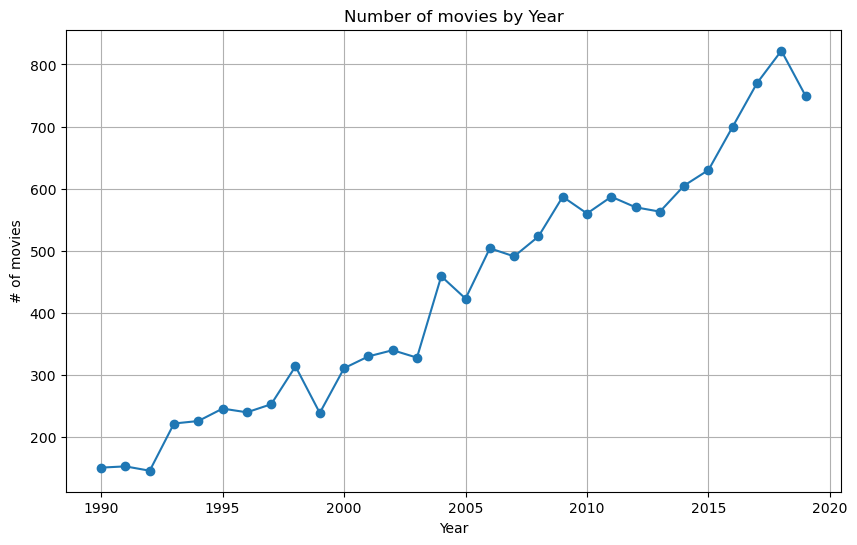

In [21]:
# Plotting line graph of number of movies per year
plt.figure(figsize=(10, 6))
plt.plot(year_counts["Year"], year_counts["# of movies"], marker="o", linestyle="-")
plt.title("Number of movies by Year")
plt.xlabel("Year")
plt.ylabel("# of movies")
plt.grid(True)
plt.show()

In [22]:
# Count the number of movies within each genre
genre_counts = genre_df.groupby("Genre").size().reset_index(name="# of movies")
# Sort number of movies per genre in descending order
genre_counts= genre_counts.sort_values(by="# of movies", ascending=False)
genre_counts

,Genre,# of movies
6,Drama,1734
3,Comedy,1581
16,Thriller,1376
0,Action,1375
1,Adventure,980
7,Family,824
10,Horror,740
4,Crime,679
13,Romance,677
14,Science Fiction,666


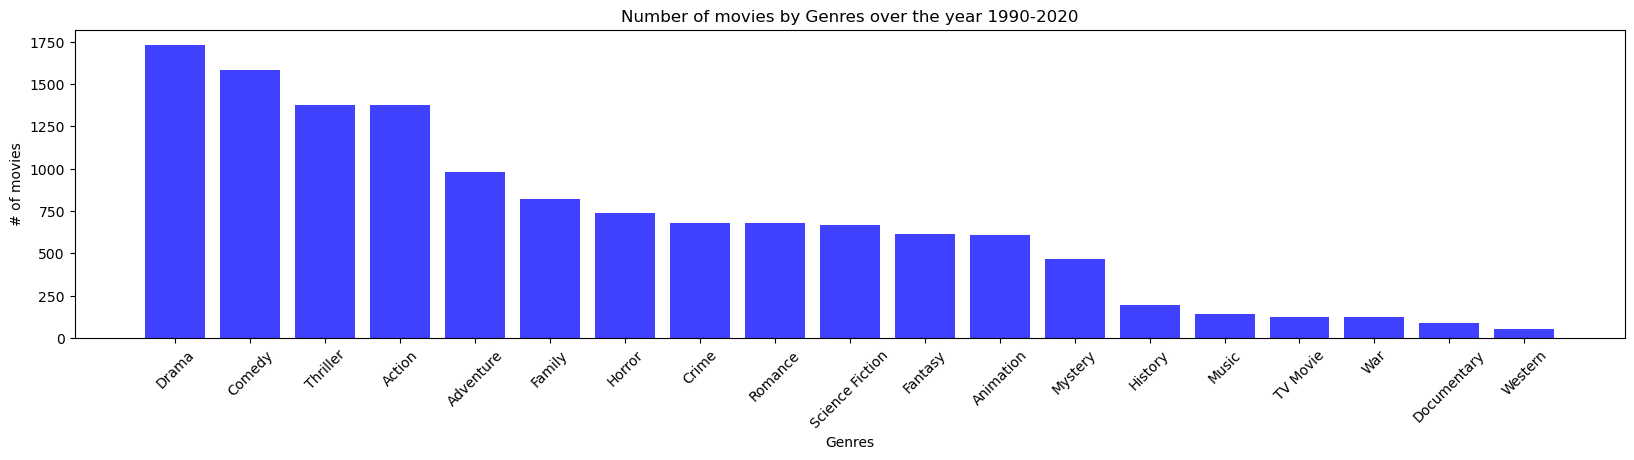

In [23]:
# Create a bar chart to show revenue totals for each genre arranged in decending order
x_axis = np.arange(len(genre_counts))
tick_locations = [value+0.4 for value in x_axis]
y_axis = genre_counts["# of movies"]

# Plotting a bar chart
plt.figure(figsize=(20,4))
plt.bar(x_axis, y_axis, color='blue', alpha=0.75, align="edge")
plt.xticks(tick_locations, genre_counts["Genre"], rotation=45)
plt.title("Number of movies by Genres over the year 1990-2020")
plt.xlabel("Genres")
plt.ylabel("# of movies")
plt.show()

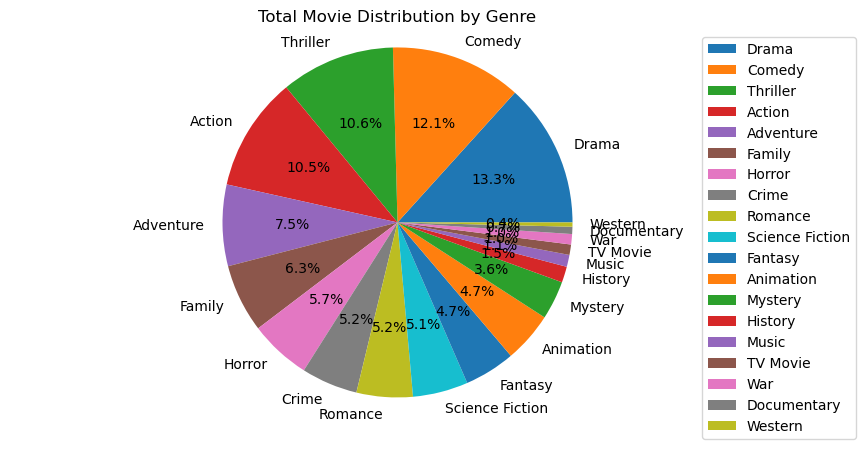

In [24]:
# Plotting the pie chart
plt.figure(figsize=(10, 5))
plt.pie(genre_counts["# of movies"], labels=genre_counts["Genre"], autopct='%1.1f%%')
plt.legend(loc="upper right", bbox_to_anchor=(1.1, 1))
plt.title("Total Movie Distribution by Genre")
plt.axis("equal")
plt.show()

In [25]:
# Sum of Divided revenue each genre
revenue_sum = genre_df.groupby("Genre")["Divided Revenue"].sum().reset_index(name="Sum of Divided Revenue")
# Sort revenue sum in descending order
revenue_sum = revenue_sum.sort_values(by="Sum of Divided Revenue", ascending=False)
revenue_sum

,Genre,Sum of Divided Revenue
3,Comedy,"113,859,364,147.32"
0,Action,"111,619,668,149.39"
6,Drama,"107,708,221,267.81"
1,Adventure,"91,090,687,135.91"
16,Thriller,"79,120,458,640.61"
7,Family,"76,313,669,848.82"
2,Animation,"69,112,095,749.49"
14,Science Fiction,"59,122,597,514.46"
10,Horror,"54,681,252,980.81"
8,Fantasy,"54,651,733,970.29"


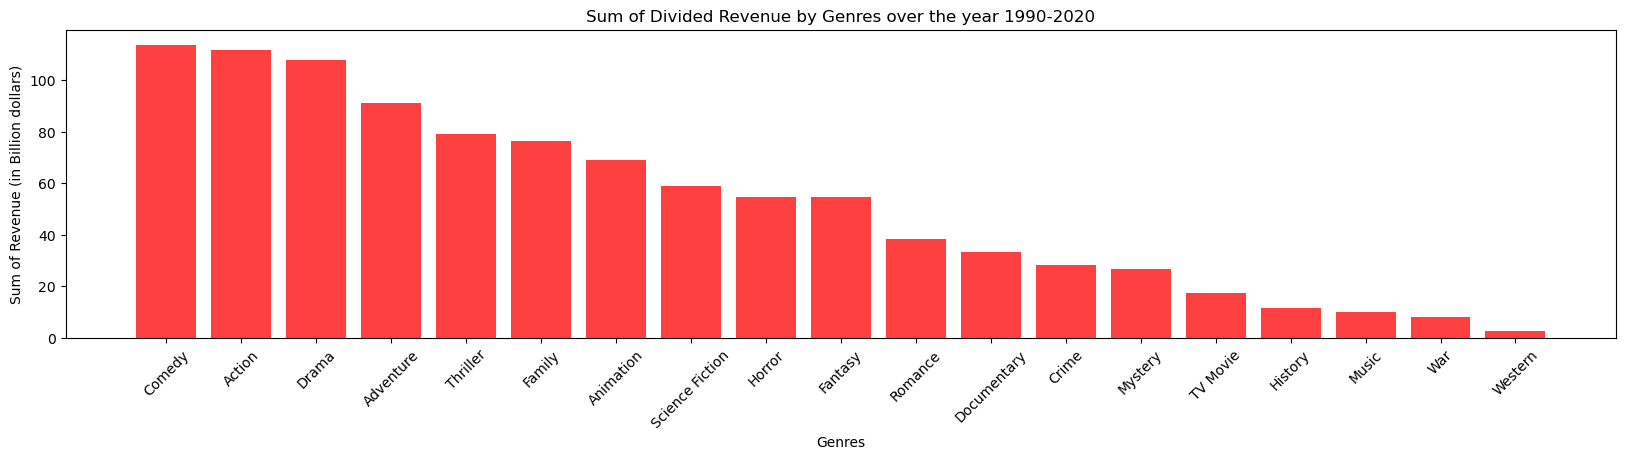

In [26]:
# Create a bar chart to show divided revenue totals for each genre arranged in decending order
x_axis = np.arange(len(revenue_sum))
tick_locations = [value+0.4 for value in x_axis]
y_axis = revenue_sum["Sum of Divided Revenue"]

# Plotting a bar chart
plt.figure(figsize=(20,4))
plt.bar(x_axis, y_axis/1000000000, color='r', alpha=0.75, align="edge")
plt.xticks(tick_locations, revenue_sum["Genre"], rotation=45)
plt.title("Sum of Divided Revenue by Genres over the year 1990-2020")
plt.xlabel("Genres")
plt.ylabel("Sum of Revenue (in Billion dollars)")
plt.show()

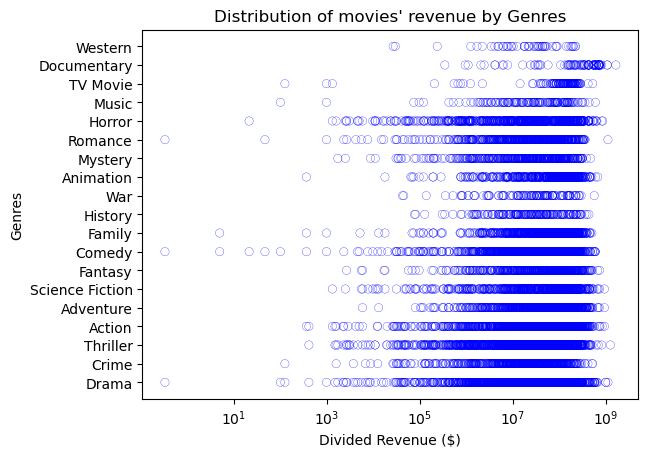

In [27]:
# Distribution of movies revenue by Genres
x_axis = genre_df["Divided Revenue"]
y_axis = genre_df["Genre"]

plt.scatter(x_axis, y_axis, marker="o", edgecolor="blue", facecolors="none",linewidths=0.2)
plt.xscale("log")
plt.title("Distribution of movies' revenue by Genres")
plt.ylabel("Genres")
plt.xlabel("Divided Revenue ($)")
plt.show()

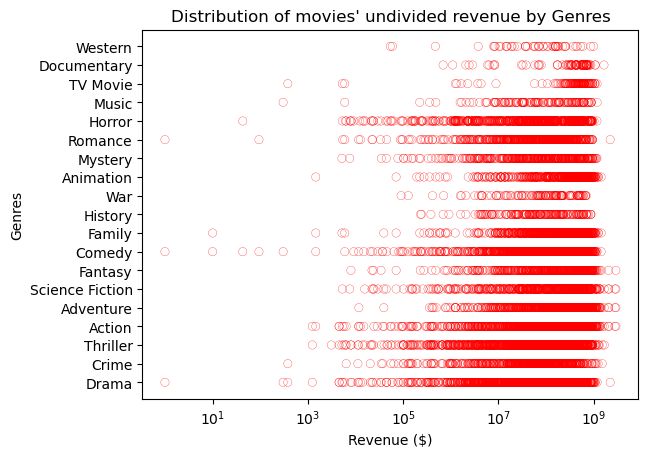

In [28]:
# Distribution of movies undivided revenue by Genres
x_axis = genre_df["Revenue"]
y_axis = genre_df["Genre"]

plt.scatter(x_axis, y_axis, marker="o", edgecolor="red", facecolors="none",linewidths=0.2)
plt.xscale("log")
plt.title("Distribution of movies' undivided revenue by Genres")
plt.ylabel("Genres")
plt.xlabel("Revenue ($)")
plt.show()

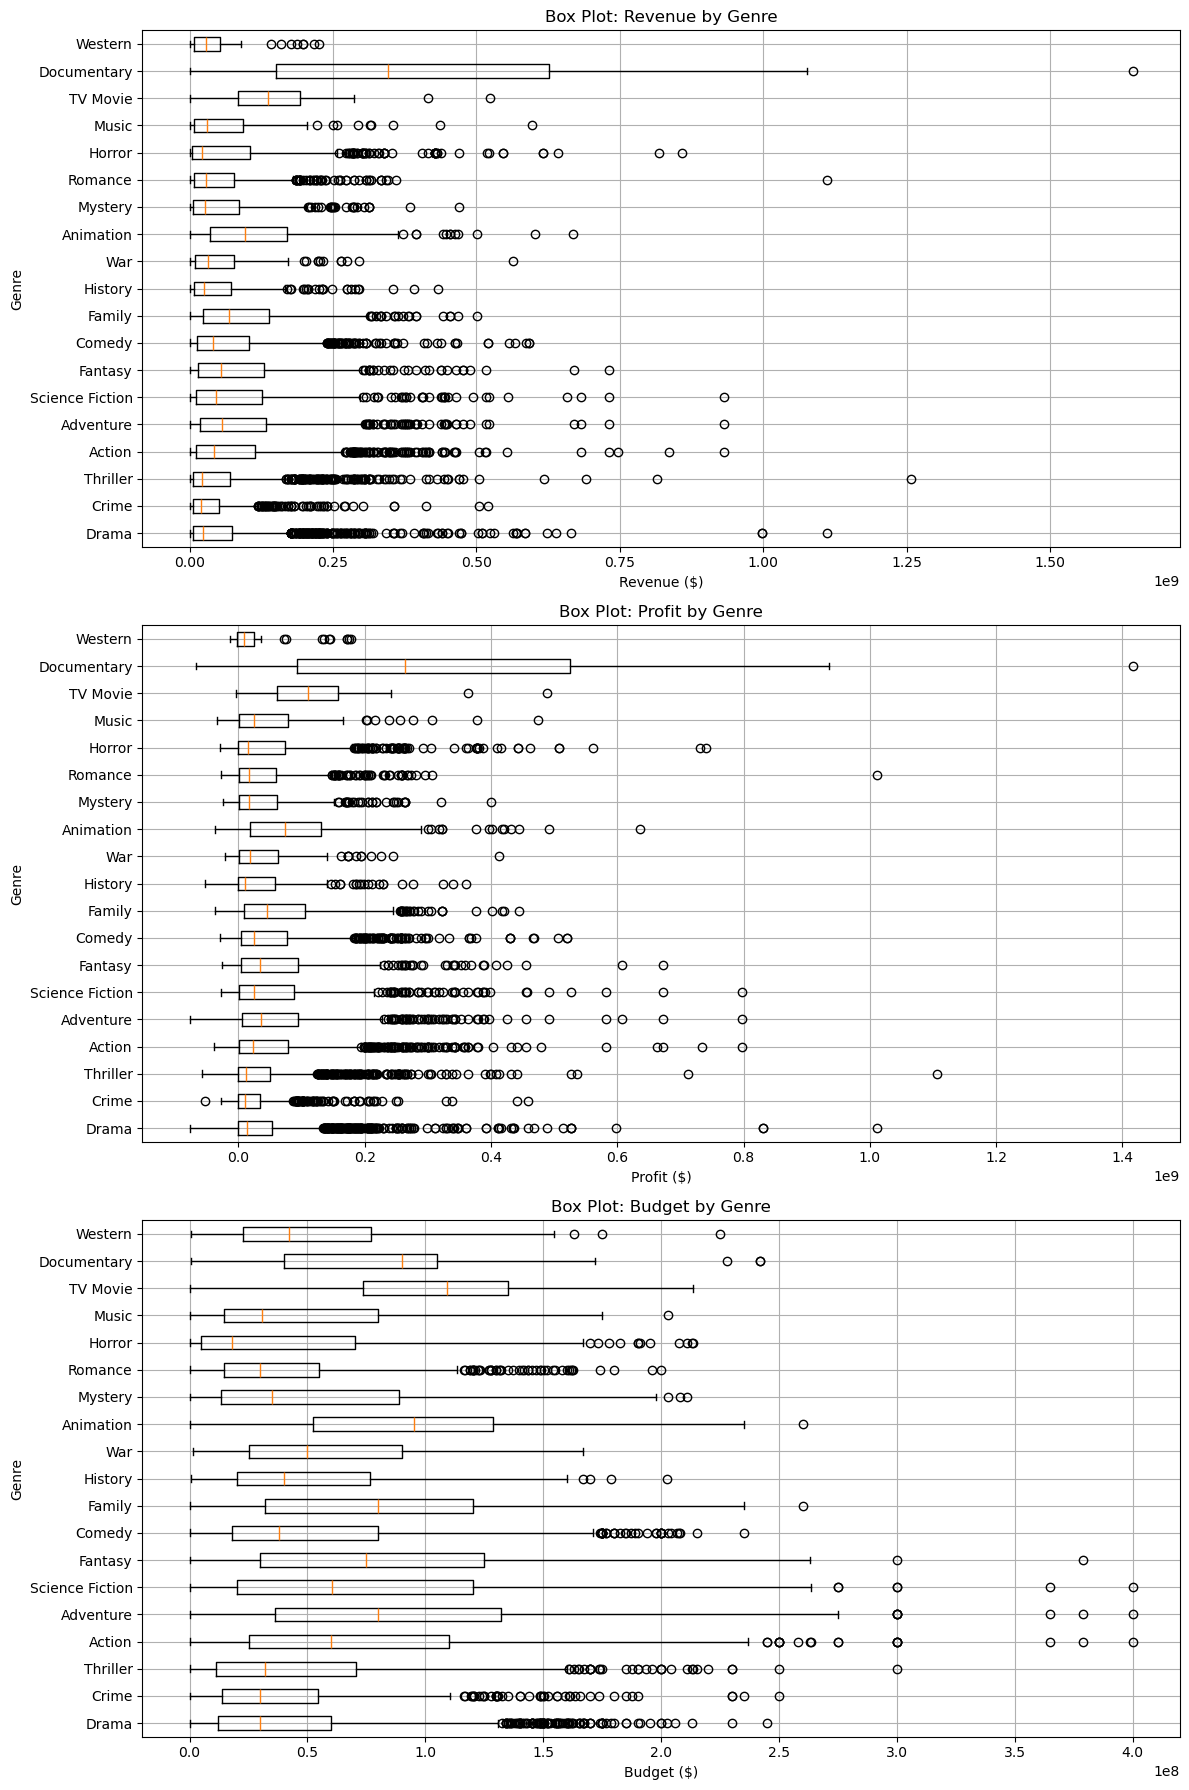

In [29]:
# Set the figure size and create subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Box plot for Revenue by Genre 
axs[0].boxplot([genre_df[genre_df["Genre"] == genre]["Divided Revenue"] for genre in genre_df["Genre"].unique()], labels=genre_df["Genre"].unique(), vert=False)
axs[0].set_xlabel("Revenue ($)")
axs[0].set_ylabel("Genre")
axs[0].set_title("Box Plot: Revenue by Genre")
axs[0].tick_params(axis='y', rotation=0)
axs[0].grid(True)

# Box plot for Profit by Genre 
axs[1].boxplot([genre_df[genre_df["Genre"] == genre]["Divided Profit"] for genre in genre_df["Genre"].unique()], labels=genre_df["Genre"].unique(), vert=False)
axs[1].set_xlabel("Profit ($)")
axs[1].set_ylabel("Genre")
axs[1].set_title("Box Plot: Profit by Genre")
axs[1].tick_params(axis='y', rotation=0)
axs[1].grid(True)

# Box plot for Budget by Genre 
axs[2].boxplot([genre_df[genre_df["Genre"] == genre]["Budget"] for genre in genre_df["Genre"].unique()], labels=genre_df["Genre"].unique(), vert=False)
axs[2].set_xlabel("Budget ($)")
axs[2].set_ylabel("Genre")
axs[2].set_title("Box Plot: Budget by Genre")
axs[2].tick_params(axis='y', rotation=0)
axs[2].grid(True)

# Adjust layout and display plot
plt.tight_layout()
plt.show()

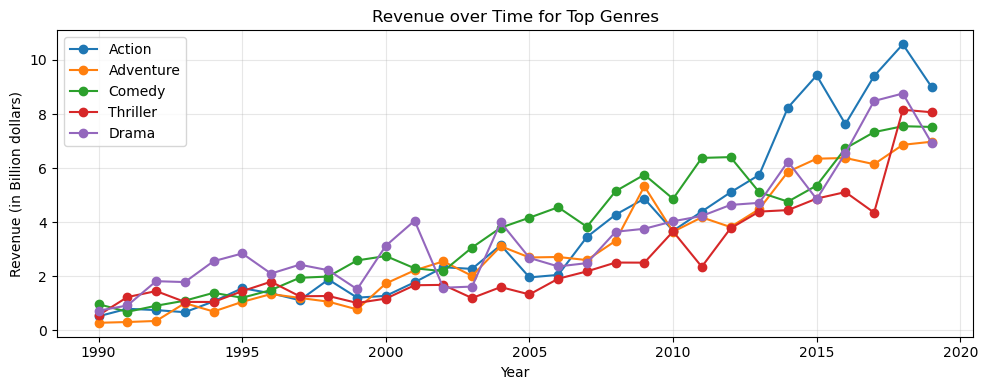

In [30]:
# Create a list of genres
genres = ["Action", "Adventure", "Comedy", "Thriller", "Drama"]
# Create a figure for the plot
plt.figure(figsize=(10, 4))
# Iterate over each genre
for genre in genres:
    # Filter the DataFrame for the current genre
    genre_filter_df = genre_df[genre_df["Genre"] == genre]
    # Group by year and calculate the median revenue for each year
    genre_revenue_df = genre_filter_df.groupby("Year")["Divided Revenue"].sum().reset_index()
    # Plot median revenue for the current genre
    plt.plot(genre_revenue_df["Year"], genre_revenue_df["Divided Revenue"]/1000000000, marker="o", linestyle="-", label=genre)
# Add title and labels
plt.title("Revenue over Time for Top Genres")
plt.xlabel("Year")
plt.ylabel("Revenue (in Billion dollars)")
plt.legend()
plt.grid(True, alpha=0.3)
# Show plot
plt.tight_layout()
plt.show()

In [31]:
# Filter the DataFrame to the decades (1990-1999, 2000-2009, 2010-2019)  

nineties_df = genre_df.loc[(genre_df["Year"] >= 1990) & (genre_df["Year"] <= 1999)]
twenties_df = genre_df.loc[(genre_df["Year"] >= 2000) & (genre_df["Year"] <= 2009)]
twentyone_df = genre_df.loc[(genre_df["Year"] >= 2010) & (genre_df["Year"] <= 2019)]

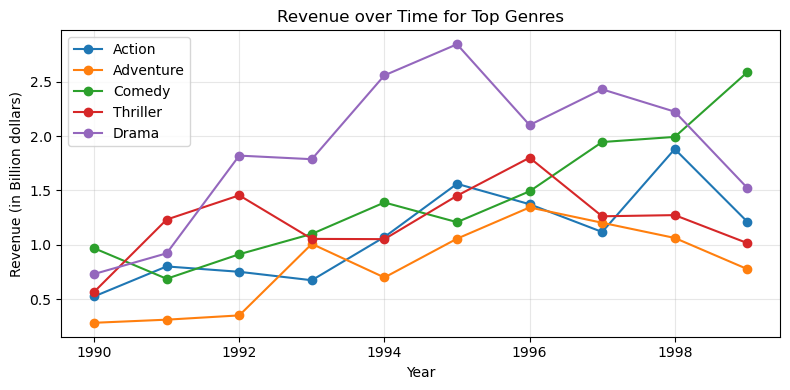

In [32]:
# Create a list of genres
genres = ["Action", "Adventure", "Comedy", "Thriller", "Drama"]
# Create a figure for the plot
plt.figure(figsize=(8, 4))
# Iterate over each genre
for genre in genres:
    # Filter the DataFrame for the current genre
    nineties_filter_df = nineties_df[nineties_df["Genre"] == genre]
    # Group by year and calculate the median revenue for each year
    genre_revenue_df = nineties_filter_df.groupby("Year")["Divided Revenue"].sum().reset_index()
    # Plot median revenue for the current genre
    plt.plot(genre_revenue_df["Year"], genre_revenue_df["Divided Revenue"]/1000000000, marker="o", linestyle="-", label=genre)
# Add title and labels
plt.title("Revenue over Time for Top Genres")
plt.xlabel("Year")
plt.ylabel("Revenue (in Billion dollars)")
plt.legend()
plt.grid(True, alpha=0.3)
# Show plot
plt.tight_layout()
plt.show()

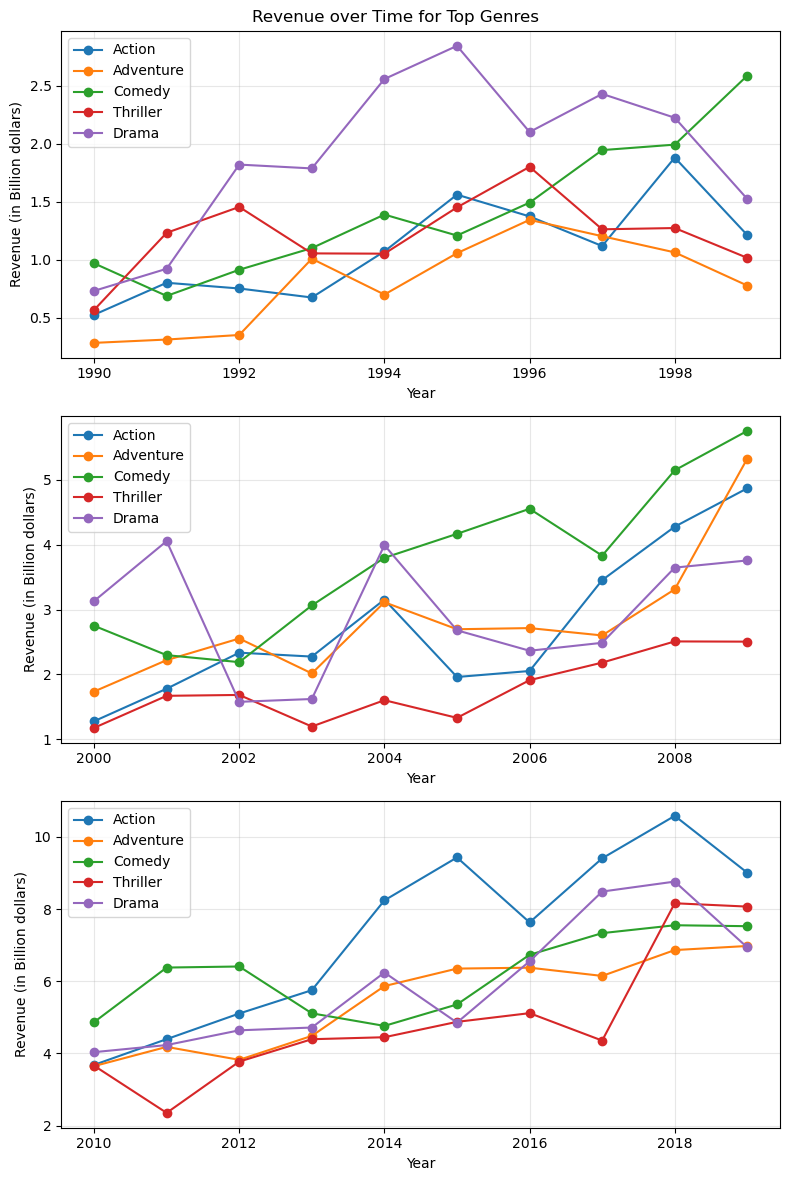

In [33]:
# Plot three decades in one figure
# Create a list of genres
genres = ["Action", "Adventure", "Comedy", "Thriller", "Drama"]

# Create a figure with three subplots arranged in a column.
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Iterate over each decade and subplot index
for df, ax in zip([nineties_df, twenties_df, twentyone_df], axs):
    # Iterate over each genre
    for genre in genres:
        # Filter the DataFrame for the current genre and decade
        filter_df = df[df["Genre"] == genre]
        # Group by year and calculate the sum of revenue for each year
        genre_revenue_df = filter_df.groupby("Year")["Divided Revenue"].sum().reset_index()
        # Plot the revenue for the current genre and decade
        ax.plot(genre_revenue_df["Year"], genre_revenue_df["Divided Revenue"]/1000000000, marker="o", linestyle="-", label=genre)

    # Add labels to each subplot
    ax.set_xlabel("Year")
    ax.set_ylabel("Revenue (in Billion dollars)")
    ax.legend()
    ax.grid(True, alpha=0.3)

# Add title to the figure
fig.suptitle("Revenue over Time for Top Genres")

# Adjust layout and display plot
plt.tight_layout()
plt.show()

# Create a table of statistical summary

# Plot based on Median

In [34]:
# Find revenue median for each genre
revenue_median = genre_df.groupby("Genre")["Divided Revenue"].median().reset_index(name="Median of Divided Revenue")
# Sort revenue median in descending order
revenue_median = revenue_median.sort_values(by="Median of Divided Revenue", ascending=False)
revenue_median

,Genre,Median of Divided Revenue
5,Documentary,"345,336,673.40"
15,TV Movie,"136,956,343.35"
2,Animation,"96,074,609.39"
7,Family,"68,860,772.75"
1,Adventure,"56,602,484.33"
8,Fantasy,"54,383,809.25"
14,Science Fiction,"45,859,882.52"
0,Action,"43,404,720.67"
3,Comedy,"41,670,086.67"
17,War,"32,569,678.00"


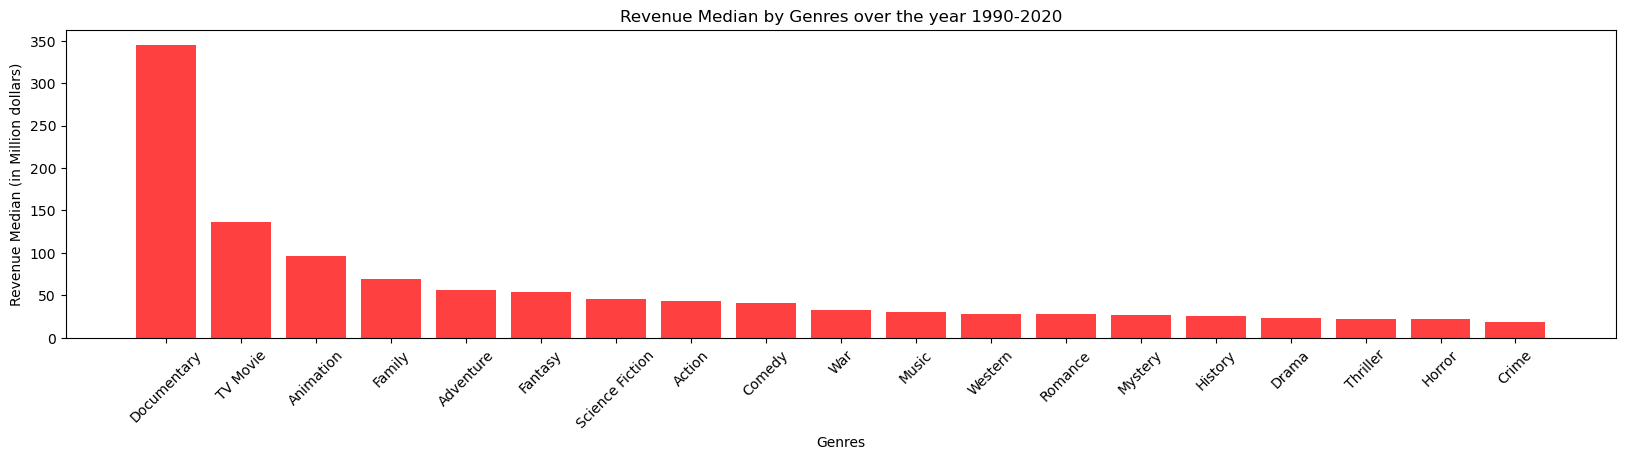

In [35]:
# Create a bar chart to show revenue median for each genre arranged in decending order
x_axis = np.arange(len(revenue_median))
tick_locations = [value+0.4 for value in x_axis]
y_axis = revenue_median["Median of Divided Revenue"]

# Plotting a bar chart
plt.figure(figsize=(20,4))
plt.bar(x_axis, y_axis/1000000, color='r', alpha=0.75, align="edge")
plt.xticks(tick_locations, revenue_median["Genre"], rotation=45)
plt.title("Revenue Median by Genres over the year 1990-2020")
plt.xlabel("Genres")
plt.ylabel("Revenue Median (in Million dollars)")
plt.show()

In [36]:
# Find revenue median and mean for each genre
revenue_stats = genre_df.groupby("Genre")["Divided Revenue"].agg(["median", "mean"]).reset_index()
revenue_stats.columns = ["Genre", "Median of Divided Revenue", "Mean of Divided Revenue"]

# Sort by median revenue in descending order
revenue_stats = revenue_stats.sort_values(by="Median of Divided Revenue", ascending=False)
revenue_stats

,Genre,Median of Divided Revenue,Mean of Divided Revenue
5,Documentary,"345,336,673.40","382,248,384.77"
15,TV Movie,"136,956,343.35","140,764,781.27"
2,Animation,"96,074,609.39","113,671,210.11"
7,Family,"68,860,772.75","92,613,677.00"
1,Adventure,"56,602,484.33","92,949,680.75"
8,Fantasy,"54,383,809.25","89,300,218.91"
14,Science Fiction,"45,859,882.52","88,772,668.94"
0,Action,"43,404,720.67","81,177,940.47"
3,Comedy,"41,670,086.67","72,017,308.13"
17,War,"32,569,678.00","63,940,704.71"


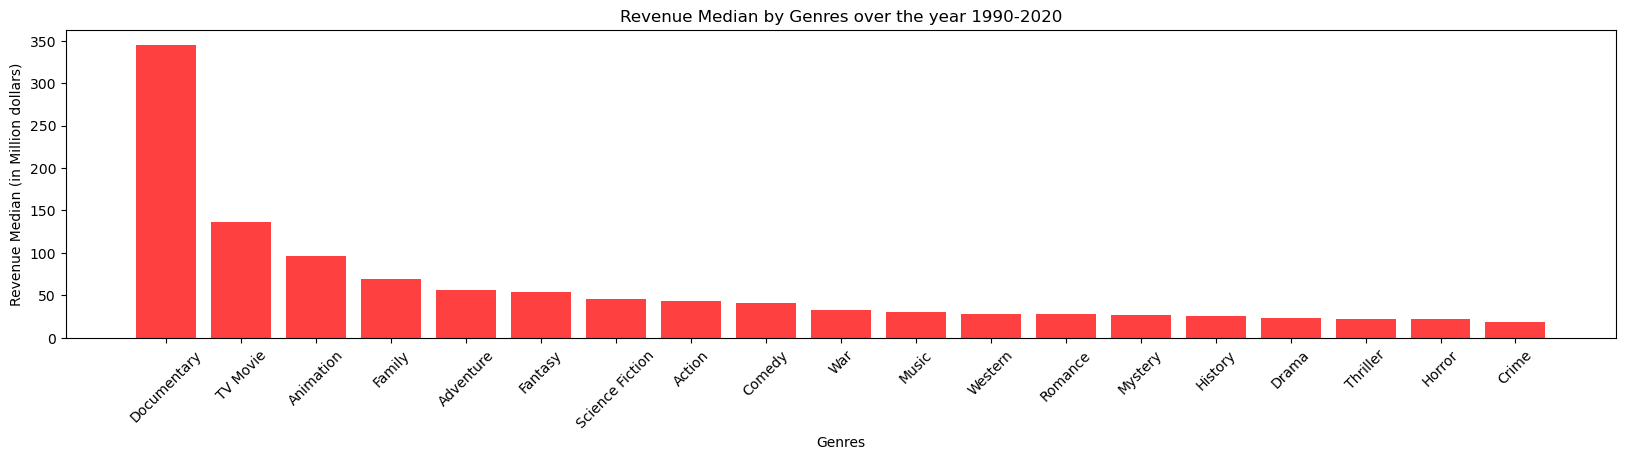

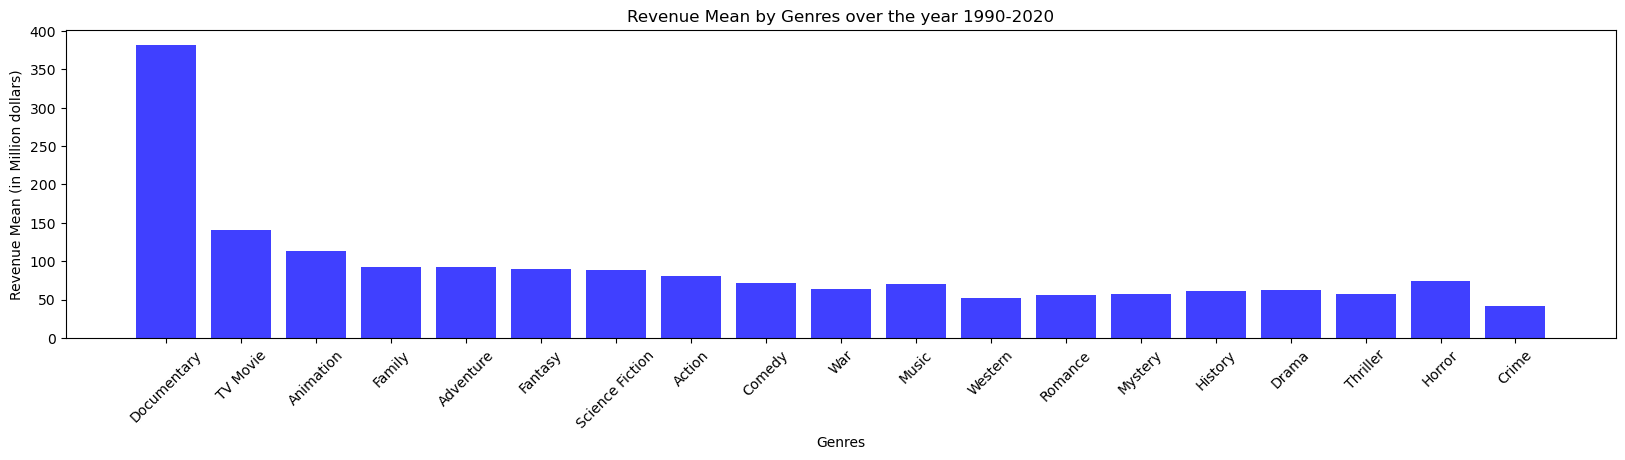

In [37]:
# Create a bar chart to show revenue median for each genre arranged in decending order
x_axis = np.arange(len(revenue_stats))
tick_locations = [value+0.4 for value in x_axis]
#y_axis = revenue_stats["Median of Divided Revenue"]

# Plotting a bar chart
plt.figure(figsize=(20,4))
plt.bar(x_axis, revenue_stats["Median of Divided Revenue"]/1000000, color='r', alpha=0.75, align="edge")
plt.xticks(tick_locations, revenue_stats["Genre"], rotation=45)
plt.title("Revenue Median by Genres over the year 1990-2020")
plt.xlabel("Genres")
plt.ylabel("Revenue Median (in Million dollars)")
plt.show()

# Plotting a bar chart
plt.figure(figsize=(20,4))
plt.bar(x_axis, revenue_stats["Mean of Divided Revenue"]/1000000, color='blue', alpha=0.75, align="edge")
plt.xticks(tick_locations, revenue_stats["Genre"], rotation=45)
plt.title("Revenue Mean by Genres over the year 1990-2020")
plt.xlabel("Genres")
plt.ylabel("Revenue Mean (in Million dollars)")
plt.show()

#  We turn our attention to incorporating scores

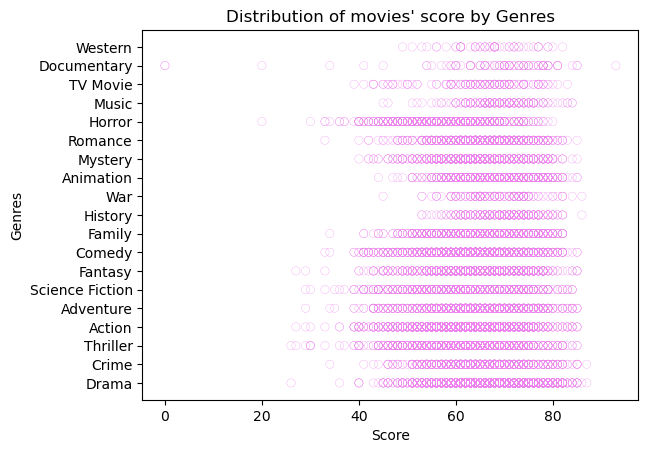

In [38]:
# Distribution of Score by Genres
x_axis = genre_df["Score"]
y_axis = genre_df["Genre"]

plt.scatter(x_axis, y_axis,marker="o", edgecolor="violet", facecolors="none",linewidths=0.2)
plt.title("Distribution of movies' score by Genres")
plt.ylabel("Genres")
plt.xlabel("Score")
plt.show()

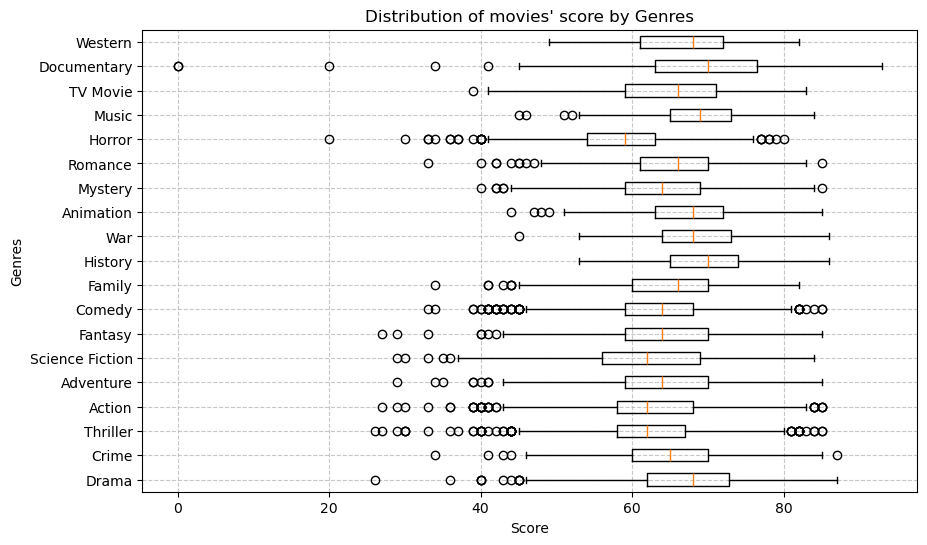

In [39]:
# Distribution of Score by Genres
x_axis = genre_df["Score"]
y_axis = genre_df["Genre"]

# By using Box plot
plt.figure(figsize=(10, 6))
plt.boxplot([x_axis[genre_df["Genre"] == genre] for genre in genre_df["Genre"].unique()], labels=genre_df["Genre"].unique(), vert=False)
plt.title("Distribution of movies' score by Genres")
plt.xlabel("Score")
plt.ylabel("Genres")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [40]:
# Grouping by "Score" and counting number of movies per Score
score_counts = genre_df.groupby("Score").size().reset_index(name="# of movies")
score_counts

,Score,# of movies
0,0.00,2
1,20.00,2
2,26.00,2
3,27.00,3
4,29.00,5
...,...,...
56,84.00,29
57,85.00,28
58,86.00,3
59,87.00,2


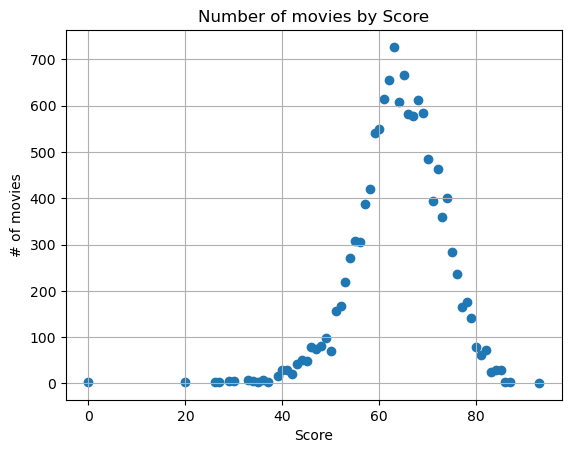

In [41]:
# Create a scatter plot of number of movies by score
x = score_counts["Score"]
y = score_counts["# of movies"]

plt.scatter(x, y, marker="o")
plt.title("Number of movies by Score")
plt.xlabel("Score")
plt.ylabel("# of movies")
plt.grid(True)
plt.show()

In [42]:
# Grouping by "Score" and "Genre", then counting number of movies per Score
score_genre_counts = genre_df.groupby(["Score","Genre"]).size().reset_index(name="# of movies")
score_genre_counts

,Score,Genre,# of movies
0,0.00,Documentary,2
1,20.00,Documentary,1
2,20.00,Horror,1
3,26.00,Drama,1
4,26.00,Thriller,1
...,...,...,...
801,86.00,History,1
802,86.00,War,1
803,87.00,Crime,1
804,87.00,Drama,1


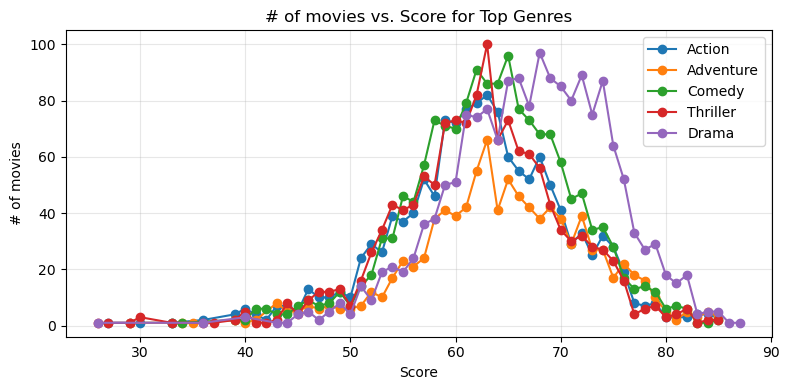

In [43]:
# Create a list of genres
genres = ["Action", "Adventure", "Comedy", "Thriller", "Drama"]

# Create a figure for the plot
plt.figure(figsize=(8, 4))

# Iterate over each genre
for genre in genres:
    # Filter the DataFrame for the current genre
    score_genre_df = score_genre_counts[score_genre_counts["Genre"] == genre]
    # Plot total of movies for the current genre
    plt.plot(score_genre_df["Score"], score_genre_df["# of movies"], marker="o", linestyle="-", label=genre)

# Iterate over each decade and subplot index
for df, ax in zip([nineties_df, twenties_df, twentyone_df], axs):
    # Iterate over each genre
    for genre in genres:
        # Filter the DataFrame for the current genre and decade
        filter_df = df[df["Genre"] == genre]
        # Group by year and calculate the sum of revenue for each year
        genre_revenue_df = filter_df.groupby("Year")["Divided Revenue"].sum().reset_index()
        # Plot the revenue for the current genre and decade
        ax.plot(genre_revenue_df["Year"], genre_revenue_df["Divided Revenue"]/1000000000, marker="o", linestyle="-", label=genre)

    
# Add title and labels
plt.title("# of movies vs. Score for Top Genres")
plt.xlabel("Score")
plt.ylabel("# of movies")
plt.legend()
plt.grid(True, alpha=0.3)
# Show plot
plt.tight_layout()
plt.show()

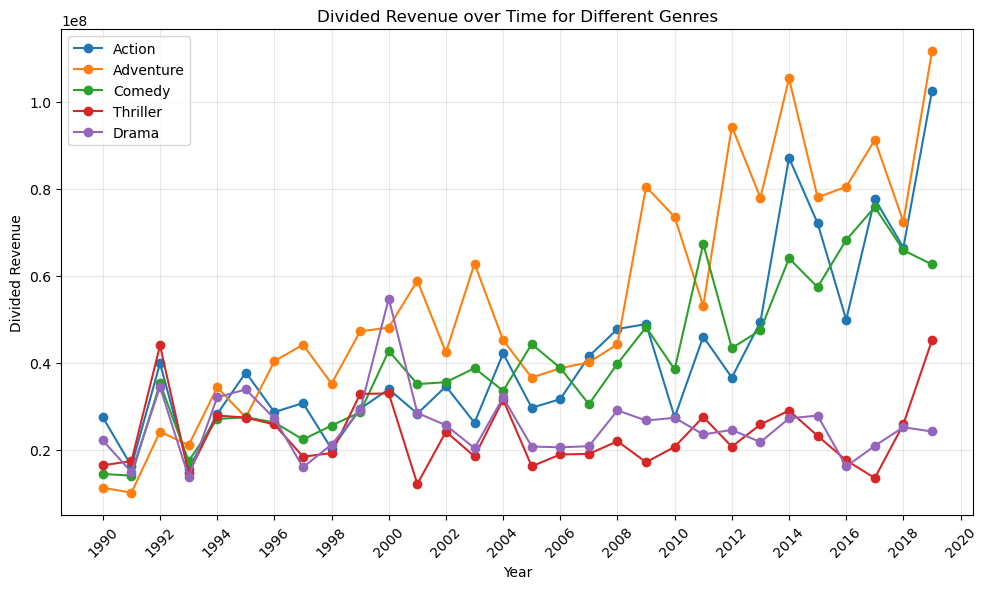

In [44]:
# Create a list of genres
genres = ["Action", "Adventure", "Comedy", "Thriller", "Drama"]

# Create a figure for the plot
plt.figure(figsize=(10, 6))

# Iterate over each genre
for genre in genres:
    # Filter the DataFrame for the current genre
    df_genre_genre = genre_df[genre_df['Genre'] == genre]
    
    # Group by year and calculate the median revenue for each year
    df_median_revenue = df_genre_genre.groupby('Year')['Divided Revenue'].median().reset_index()
    
    # Plot median revenue for the current genre
    plt.plot(df_median_revenue['Year'], df_median_revenue['Divided Revenue'], marker='o', linestyle='-', label=genre)

# Add title and labels
plt.title('Divided Revenue over Time for Different Genres')
plt.xlabel('Year')
plt.ylabel('Divided Revenue')
plt.legend()
# Customize the xticks
plt.xticks(range(1990, 2021, 2), rotation=45)
plt.grid(True, alpha=0.3)

# Show plot
plt.tight_layout()
plt.show()

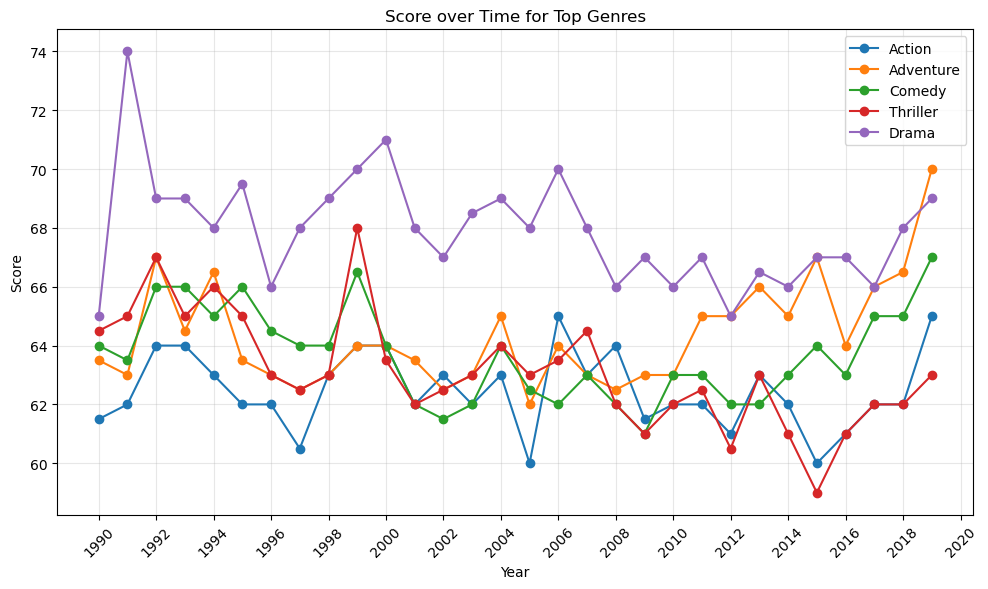

In [45]:
# Create a list of genres
genres = ["Action", "Adventure", "Comedy", "Thriller", "Drama"]

# Create a figure for the plot
plt.figure(figsize=(10, 6))

# Iterate over each genre
for genre in genres:
    # Filter the DataFrame for the current genre
    score_genre_year = genre_df[genre_df["Genre"] == genre]
    
    # Group by year and calculate the median revenue for each year
    score_genre_median = score_genre_year.groupby("Year")["Score"].median().reset_index()
    
    # Plot median score for the current genre
    plt.plot(score_genre_median["Year"], score_genre_median["Score"], marker="o", linestyle="-", label=genre)
    
# Add title and labels
plt.title("Score over Time for Top Genres")
plt.xlabel("Year")
plt.ylabel("Score")
plt.xticks(range(1990, 2021, 2), rotation=45)
plt.legend(loc="best")
plt.grid(True, alpha=0.3)
# Show plot
plt.tight_layout()
plt.show()

# Disposable Personal Income Summary: Disposable Personal Income,Population, and Per Capita Disposable Personal Income
** DPI is amount of money that an individual or household has to spend or save after income taxes have been deducted

In [46]:
# Filter for selected Genres
df_genre_copy = genre_df.copy()
df_genre_copy["Genre"] = df_genre_copy["Genre"].str.strip().str.lower()
selected_genres = ["action", "adventure", "comedy", "thriller", "drama"]
df_genre_filtered = df_genre_copy[df_genre_copy["Genre"].isin(selected_genres)].copy()  # Explicitly create a copy
df_genre_filtered["Genre"] = df_genre_filtered["Genre"].str.capitalize()  # Capitalize genre names

Final_df_DPI = df_genre_filtered.groupby(["Genre", "Year"], observed=False)[["Divided Profit", "Divided Revenue"]].median().reset_index()
Final_df_DPI.head(5)

,Genre,Year,Divided Profit,Divided Revenue
0,Action,1990,"20,687,495.40","27,487,495.40"
1,Action,1991,"10,731,362.60","16,292,834.00"
2,Action,1992,"32,703,848.05","39,915,302.50"
3,Action,1993,"9,688,551.00","15,576,859.33"
4,Action,1994,"12,303,750.00","28,252,532.50"


In [47]:
# Add new columns
Final_df_DPI['Disposable personal income (DPI)']=""
Final_df_DPI['DPI UNIT MULT']=""
Final_df_DPI['Population']=""
Final_df_DPI['Population UNIT MULT']=""
Final_df_DPI.head(5)

,Genre,Year,Divided Profit,Divided Revenue,Disposable personal income (DPI),DPI UNIT MULT,Population,Population UNIT MULT
0,Action,1990,"20,687,495.40","27,487,495.40",,,,
1,Action,1991,"10,731,362.60","16,292,834.00",,,,
2,Action,1992,"32,703,848.05","39,915,302.50",,,,
3,Action,1993,"9,688,551.00","15,576,859.33",,,,
4,Action,1994,"12,303,750.00","28,252,532.50",,,,


In [ ]:
# Set the API base URL
base_url = 'https://apps.bea.gov/api/data/'

params ={ 'UserID': api_key,
    'method': 'GetData',
    'datasetname': 'REGIONAL',
    'TableName': 'SAINC51',
    'Frequency': 'A',
    'GeoFips': '00000',
    'LineCode': 'All',
    'ResultFormat': 'JSON'  
}

for i, row in Final_df_DPI.iterrows():
    year = row ["Year"]
    params["Year"]=f"{year}"
    response = requests.get(base_url, params=params).json()
    try:
        response = requests.get(base_url, params=params).json()
        Final_df_DPI.loc[i, "Disposable personal income (DPI)"] = float(response["BEAAPI"]["Results"]["Data"][0]["DataValue"])
        Final_df_DPI.loc[i, "DPI UNIT MULT"] = float(response["BEAAPI"]["Results"]["Data"][0]["UNIT_MULT"])
        Final_df_DPI.loc[i, "Population"] = float(response["BEAAPI"]["Results"]["Data"][1]["DataValue"])
        Final_df_DPI.loc[i, "Population UNIT MULT"] = float(response["BEAAPI"]["Results"]["Data"][1]["UNIT_MULT"])
    # Broaden the exception handling to catch any exception
    except Exception as e: 
        # Print the error message
        print(f"Error processing {year}: {e.args[0]} not found")  
        Final_df_DPI.loc[i, ["Disposable personal income (DPI)", "DPI UNIT MULT", "Population", "Population UNIT MULT"]] = float("nan")
        pass

    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
Final_df_DPI.head (15)

In [ ]:
Final_df_DPI["Genre"].value_counts()

In [ ]:
Final_df_DPI.dtypes

In [ ]:
# Drop rows with NaN values if there is any
Final_df_DPI['Disposable personal income (DPI)'] = pd.to_numeric(Final_df_DPI['Disposable personal income (DPI)'], errors='coerce')
Final_df_DPI = Final_df_DPI.dropna()
Final_df_DPI.reset_index(drop=True, inplace=True)
Final_df_DPI.count()

In [ ]:
Final_df_DPI.dtypes

# disposable personal income vs Revenue gives - Correlation - for different Genres

In [ ]:
# Define the regression plot function
def regression_plot(x_values, y_values, genre):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.text(x_values.min(), y_values.min(), line_eq, fontsize=12, color="red")
    plt.xlabel('Divided Revenue ($)')
    plt.ylabel('Disposable personal income ($)')
    plt.title(f"Regression: Revenue vs DPI for {genre}")
    plt.show()

# Define the correlation plot function
def correlation_plot(x_values, y_values, genre):
    correlation = st.pearsonr(x_values, y_values)
    print(f"Correlation for {genre}: {round(correlation[0], 2)}")

# Create a list of genres
genres = ["Action", "Adventure", "Comedy", "Thriller", "Drama"]

# Iterate over each genre
for genre in genres:
    # Filter DataFrame for the current genre
    df_genre = Final_df_DPI[Final_df_DPI['Genre'] == genre]    
    x_values = df_genre['Divided Revenue']
    y_values = df_genre['Disposable personal income (DPI)']
    
    # Plot regression and calculate correlation
    regression_plot(x_values, y_values, genre)
    correlation_plot(x_values, y_values, genre)